# Working With Dates in Pandas

In [1]:
import pandas as pd

## Generating Date Ranges

In [2]:
date_index = pd.date_range(start='2019-04-18 13:30:00', freq='30min', periods=10)

In [3]:
df = pd.DataFrame(dict(fatigue=range(10)), index=date_index)
df

,fatigue
2019-04-18 13:30:00,0
2019-04-18 14:00:00,1
2019-04-18 14:30:00,2
2019-04-18 15:00:00,3
2019-04-18 15:30:00,4
2019-04-18 16:00:00,5
2019-04-18 16:30:00,6
2019-04-18 17:00:00,7
2019-04-18 17:30:00,8
2019-04-18 18:00:00,9


## Resampling

In [4]:
df.resample('H').mean()

,fatigue
2019-04-18 13:00:00,0.0
2019-04-18 14:00:00,1.5
2019-04-18 15:00:00,3.5
2019-04-18 16:00:00,5.5
2019-04-18 17:00:00,7.5
2019-04-18 18:00:00,9.0


In [5]:
df = df.resample('15min').mean()

## Filling Missing Values

In [7]:
df['ffill'] = df.fatigue.ffill()
df['bfill'] = df.fatigue.bfill()
df

,fatigue,ffill,bfill
2019-04-18 13:30:00,0.0,0.0,0.0
2019-04-18 13:45:00,NaN,0.0,1.0
2019-04-18 14:00:00,1.0,1.0,1.0
2019-04-18 14:15:00,NaN,1.0,2.0
2019-04-18 14:30:00,2.0,2.0,2.0
2019-04-18 14:45:00,NaN,2.0,3.0
2019-04-18 15:00:00,3.0,3.0,3.0
2019-04-18 15:15:00,NaN,3.0,4.0
2019-04-18 15:30:00,4.0,4.0,4.0
2019-04-18 15:45:00,NaN,4.0,5.0


In [9]:
df = df.resample('30min')[['fatigue']].mean()
df

,fatigue
2019-04-18 13:30:00,0.0
2019-04-18 14:00:00,1.0
2019-04-18 14:30:00,2.0
2019-04-18 15:00:00,3.0
2019-04-18 15:30:00,4.0
2019-04-18 16:00:00,5.0
2019-04-18 16:30:00,6.0
2019-04-18 17:00:00,7.0
2019-04-18 17:30:00,8.0
2019-04-18 18:00:00,9.0


## Diff With Previous Records

In [10]:
df['diff(1)'] = df.fatigue.diff(1)
df['diff(2)'] = df.fatigue.diff(2)
df['diff(3)'] = df.fatigue.diff(3)
df

,fatigue,diff(1),diff(2),diff(3)
2019-04-18 13:30:00,0.0,NaN,NaN,NaN
2019-04-18 14:00:00,1.0,1.0,NaN,NaN
2019-04-18 14:30:00,2.0,1.0,2.0,NaN
2019-04-18 15:00:00,3.0,1.0,2.0,3.0
2019-04-18 15:30:00,4.0,1.0,2.0,3.0
2019-04-18 16:00:00,5.0,1.0,2.0,3.0
2019-04-18 16:30:00,6.0,1.0,2.0,3.0
2019-04-18 17:00:00,7.0,1.0,2.0,3.0
2019-04-18 17:30:00,8.0,1.0,2.0,3.0
2019-04-18 18:00:00,9.0,1.0,2.0,3.0


## Rolling Windows

In [11]:
df = df[['fatigue']]
df['rolling(3) sum'] = df.fatigue.rolling(3).sum()
df

/Users/zach/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,fatigue,rolling(3) sum
2019-04-18 13:30:00,0.0,NaN
2019-04-18 14:00:00,1.0,NaN
2019-04-18 14:30:00,2.0,3.0
2019-04-18 15:00:00,3.0,6.0
2019-04-18 15:30:00,4.0,9.0
2019-04-18 16:00:00,5.0,12.0
2019-04-18 16:30:00,6.0,15.0
2019-04-18 17:00:00,7.0,18.0
2019-04-18 17:30:00,8.0,21.0
2019-04-18 18:00:00,9.0,24.0


In [13]:
from acquire import get_all_data
from prepare import prep_store_data

df = prep_store_data(get_all_data())

Reading sales from local csv
Reading stores from local csv
Reading items from local csv


In [17]:
df.set_index('sale_date', inplace=True)

In [23]:
df.sort_index()
quantity = df.resample('D').quantity.sum()

In [24]:
quantity.head()

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-02 00:00:00+00:00    13678.0
2013-01-03 00:00:00+00:00    14488.0
2013-01-04 00:00:00+00:00    15677.0
2013-01-05 00:00:00+00:00    16237.0
Freq: D, Name: quantity, dtype: float64

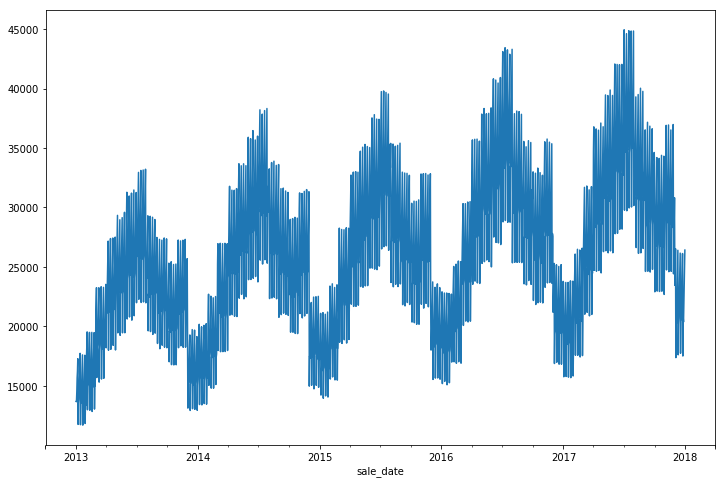

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

quantity.plot(figsize=(12, 8))

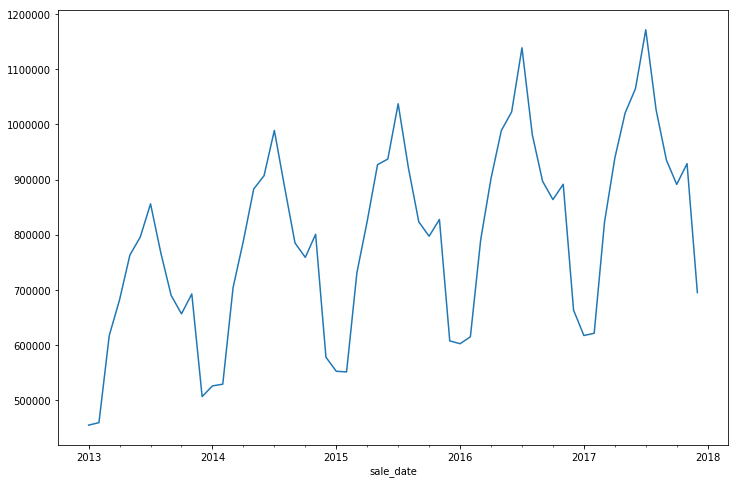

In [30]:
quantity.resample('M').sum().plot(figsize=(12, 8))

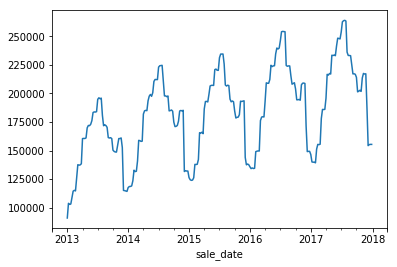

In [33]:
by_week = quantity.resample('W').sum()
by_week.plot()

In [35]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(by_week)

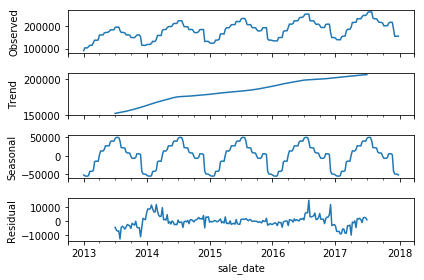

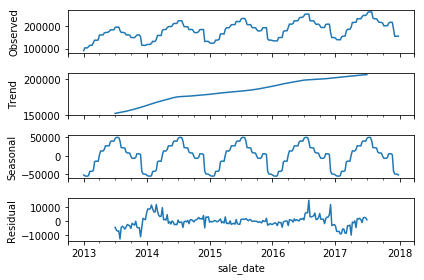

In [38]:
decomposition.plot()